# Imprt the Libraries Required for Visualization

In [3]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv file Drop its duplicates and Clean the File

In [4]:
df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv',encoding='utf-8', on_bad_lines = 'skip')
df.drop_duplicates(inplace = True)
df.reset_index(drop=True, inplace=True)

# These are top Ten highest rated books along with their number of pages

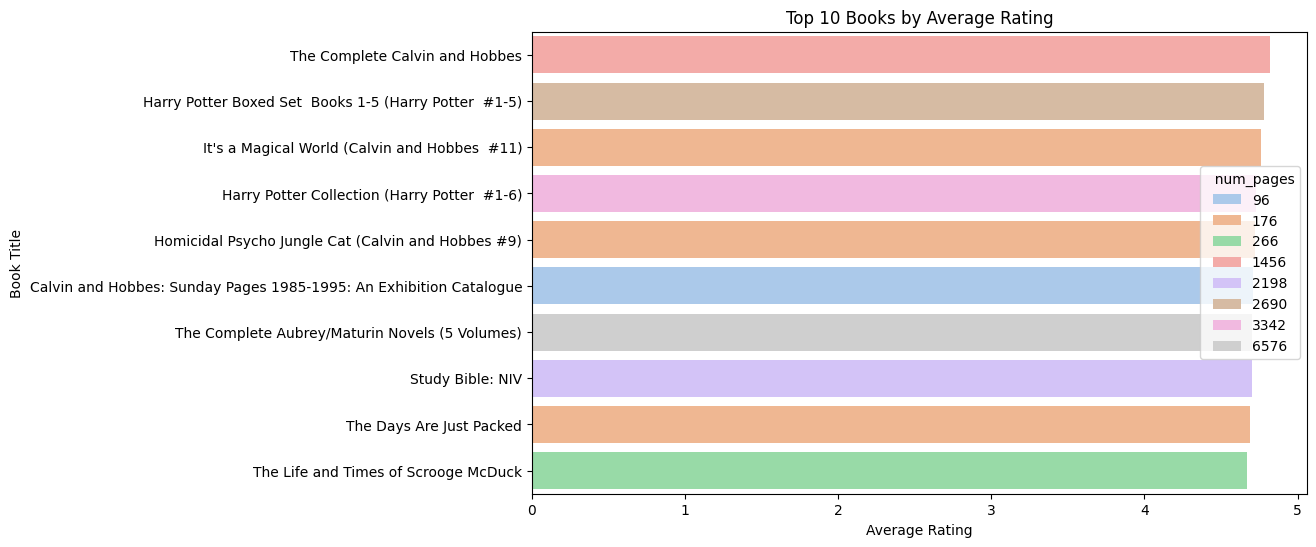

In [8]:
df.reset_index(drop=True, inplace=True)
top_books = df[df['ratings_count'] > 1000].sort_values(by='average_rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='title', hue = '  num_pages',data=top_books, palette='pastel')
plt.title('Top 10 Books by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

# TOP WRITERS WITH THEIR TOP RATED BOOKS 

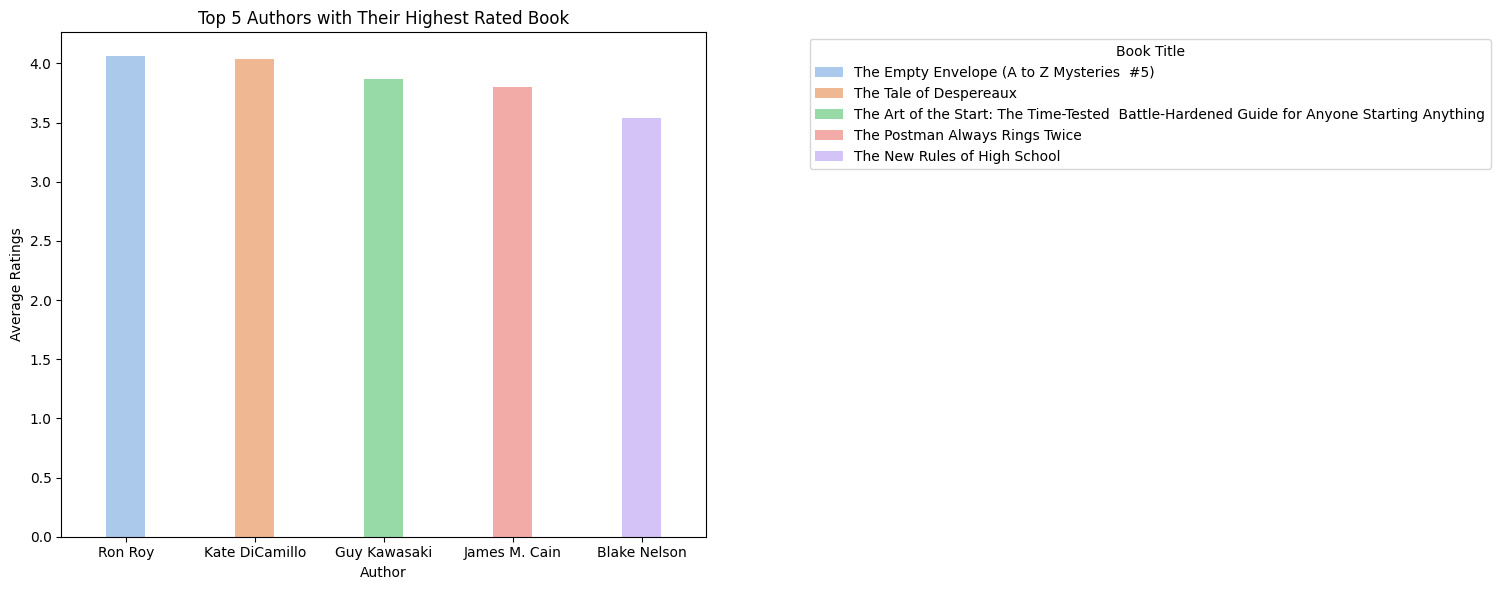

In [63]:

top_books_by_author = df.sort_values(by='average_rating', ascending=False).dropna(subset=['authors', 'average_rating'])
top_books_by_author['authors'] = top_books_by_author['authors'].apply(lambda x: x.split('/')[0])
unique_top_books = top_books_by_author.drop_duplicates(subset='authors', keep='first')
top_6 = unique_top_books.head(6)
plt.figure(figsize=(16,6))
sns.barplot(data=top_6, x='authors', y='average_rating', hue='title', dodge=False, palette='pastel', width=0.3)
plt.title('Top 5 Authors with Their Highest Rated Book')
plt.xlabel('Author')
plt.ylabel('Average Ratings')
plt.legend(title='Book Title', bbox_to_anchor=(1.15, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Top 10 Latest published Books And their Number of Pages

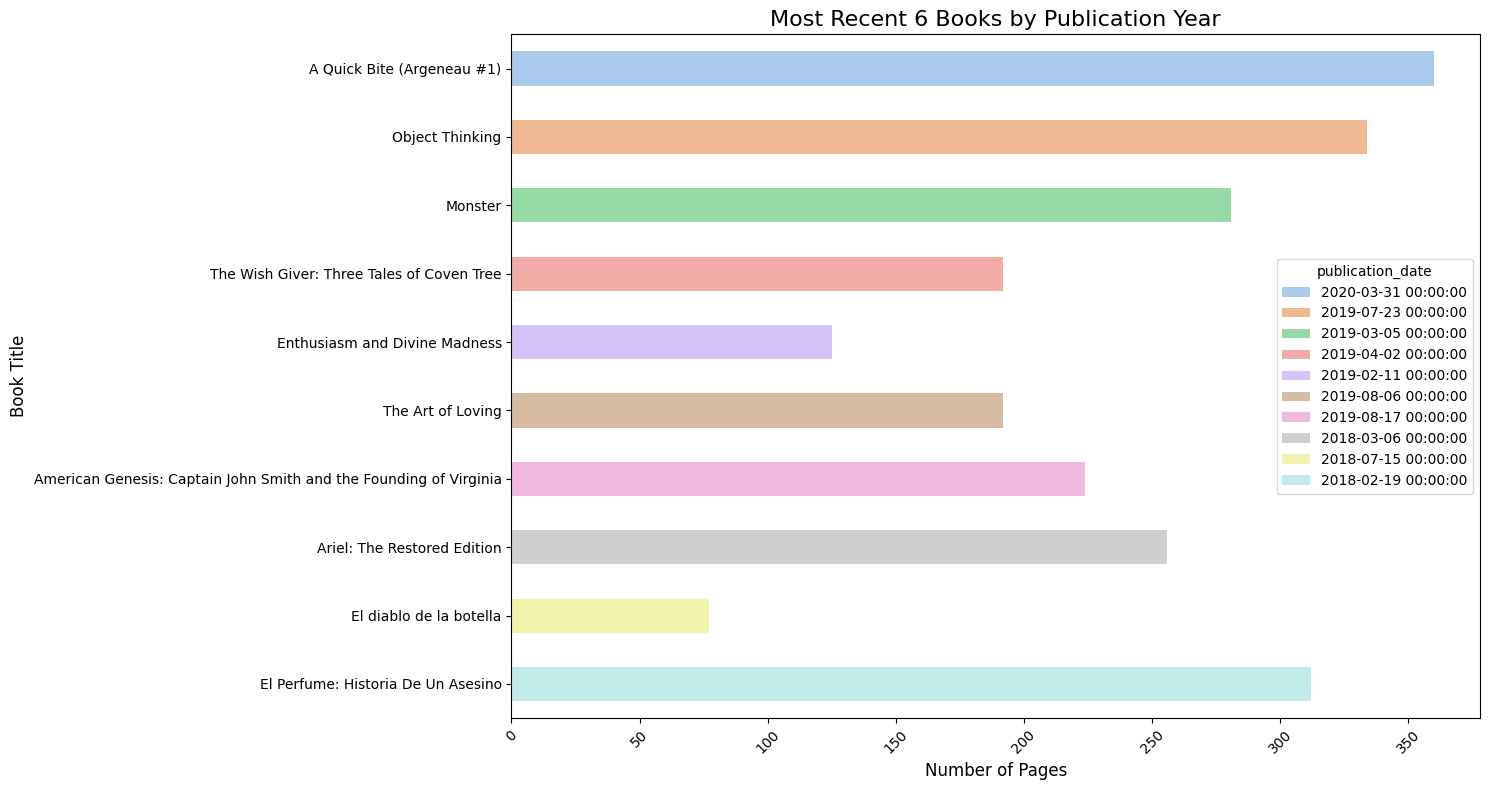

In [96]:

df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv', encoding='utf-8', on_bad_lines='skip')
df = df.dropna(subset=['publication_date'])
df = df.drop_duplicates(subset=['title'])
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df = df[df['publication_date'].notna()]
df['title'] = df['title'].apply(lambda x: x.split('/')[0])
df['publication_year'] = df['publication_date'].dt.year
df = df.sort_values(by='publication_year', ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(data=df, y='title', x='  num_pages', hue='publication_date', palette='pastel', width=0.5)
plt.xticks(rotation=45)
plt.title('Most Recent 6 Books by Publication Year', fontsize=16)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.tight_layout()
plt.show()

# Top 10 Oldest Published Books along with their Number of Pages

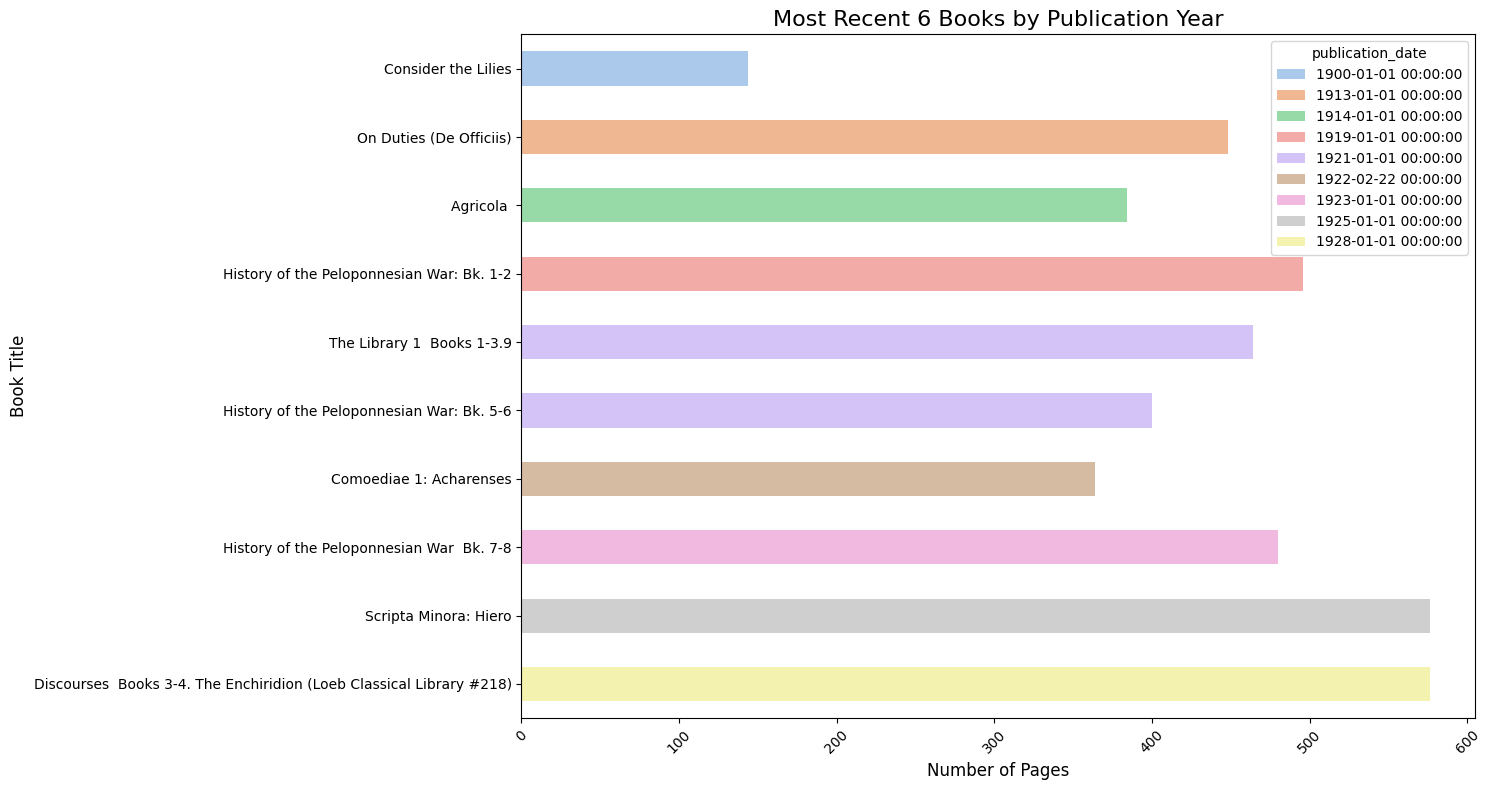

In [97]:

df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv', encoding='utf-8', on_bad_lines='skip')
df = df.dropna(subset=['publication_date'])
df = df.drop_duplicates(subset=['title'])
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df = df[df['publication_date'].notna()]
df['title'] = df['title'].apply(lambda x: x.split('/')[0])
df['publication_year'] = df['publication_date'].dt.year
df = df.sort_values(by='publication_year', ascending=True).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(data=df, y='title', x='  num_pages', hue='publication_date', palette='pastel', width=0.5)
plt.xticks(rotation=45)
plt.title('Most Recent 6 Books by Publication Year', fontsize=16)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.tight_layout()
plt.show()

# Books with least number of Pages

Books with less than 100 pages:1034
 of which top 10 are here


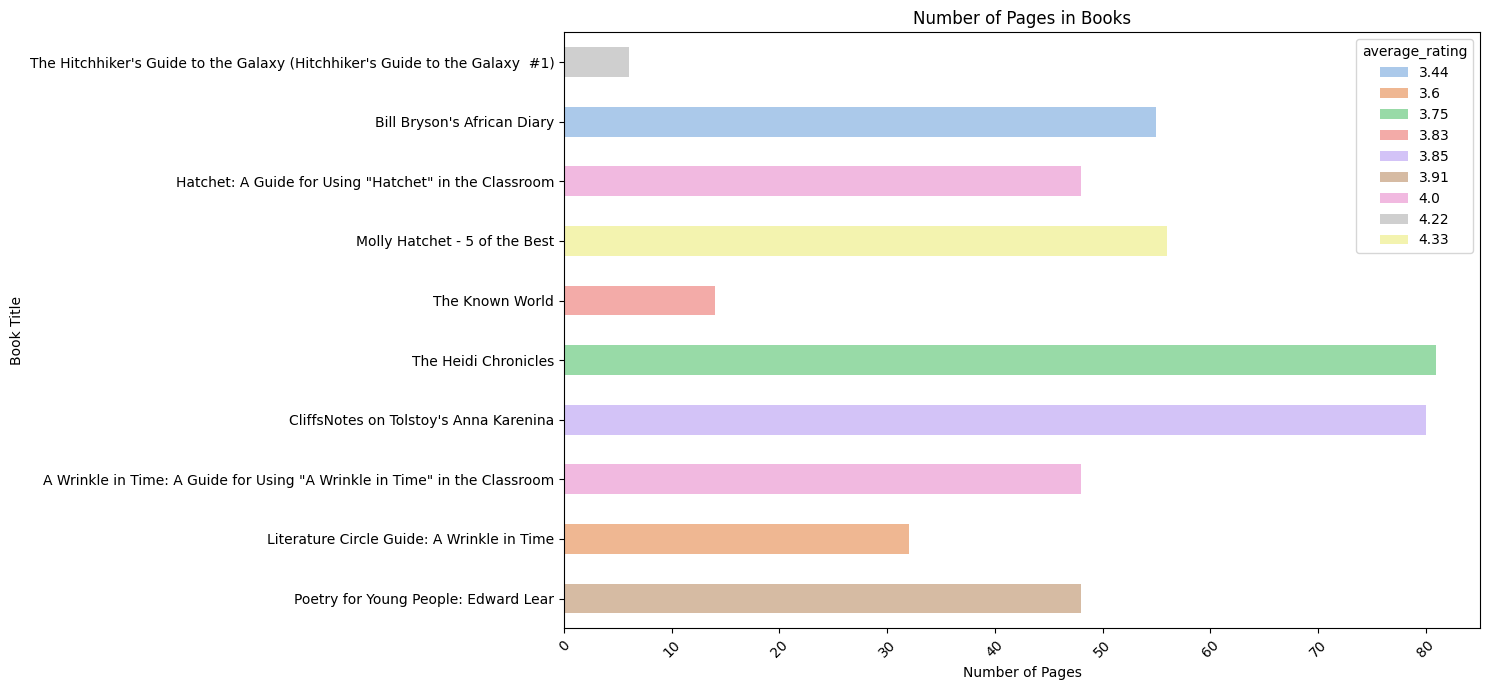

In [105]:
df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv', encoding='utf-8', on_bad_lines='skip')
df = df[df['  num_pages'] < 100]
print(f"Books with less than 100 pages:{df.count().bookID}\n of which top 10 are here")
df = df.head(10)
plt.figure(figsize=(15, 7))
sns.barplot(x='  num_pages', y = 'title', hue = 'average_rating', data=df, palette='pastel', width = 0.5)
plt.title('Number of Pages in Books')   
plt.xlabel('Number of Pages')
plt.ylabel('Book Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Books with more than 500 pages

Books with less than 100 pages:1737
 of which top 10 are here


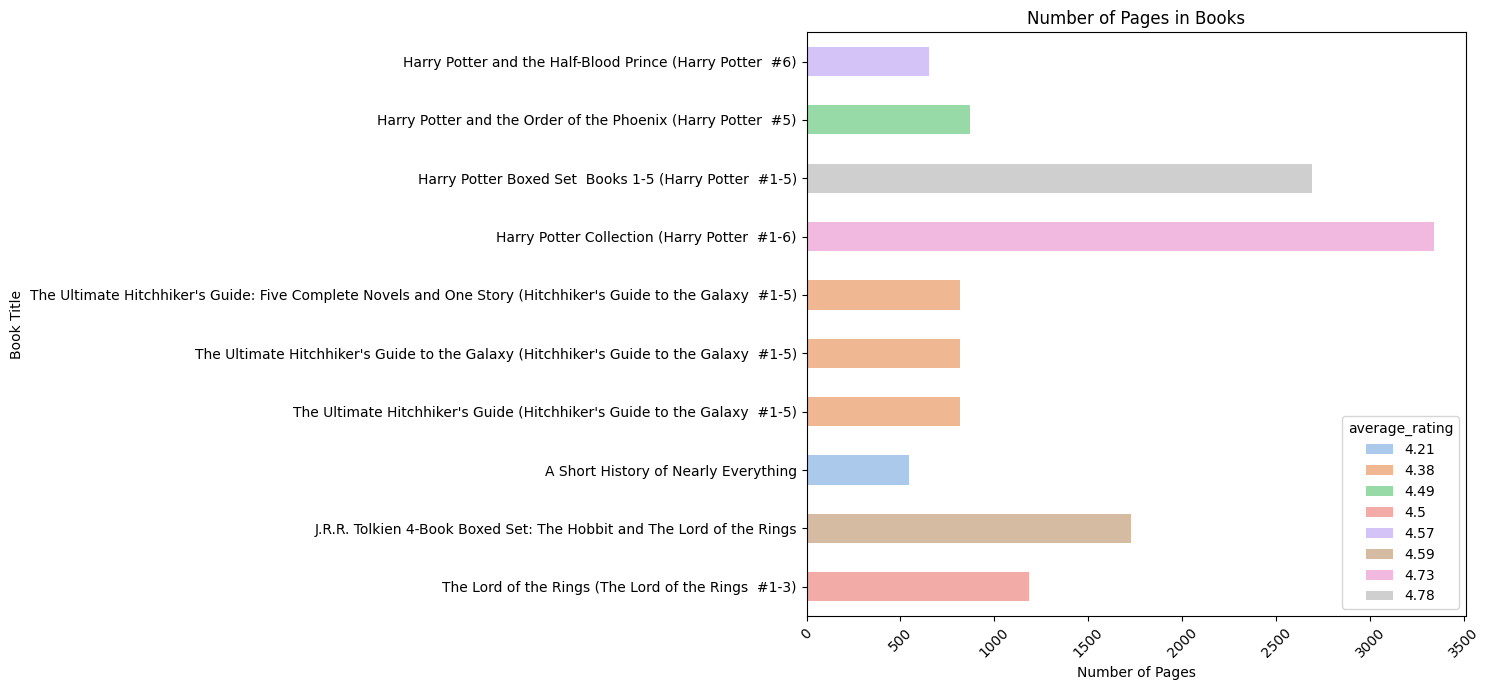

In [106]:
df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv', encoding='utf-8', on_bad_lines='skip')
df = df[df['  num_pages'] > 500]
print(f"Books with less than 100 pages:{df.count().bookID}\n of which top 10 are here")
df = df.head(10)
plt.figure(figsize=(15, 7))
sns.barplot(x='  num_pages', y = 'title', hue = 'average_rating', data=df, palette='pastel', width = 0.5)
plt.title('Number of Pages in Books')   
plt.xlabel('Number of Pages')
plt.ylabel('Book Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Books Published Each Year

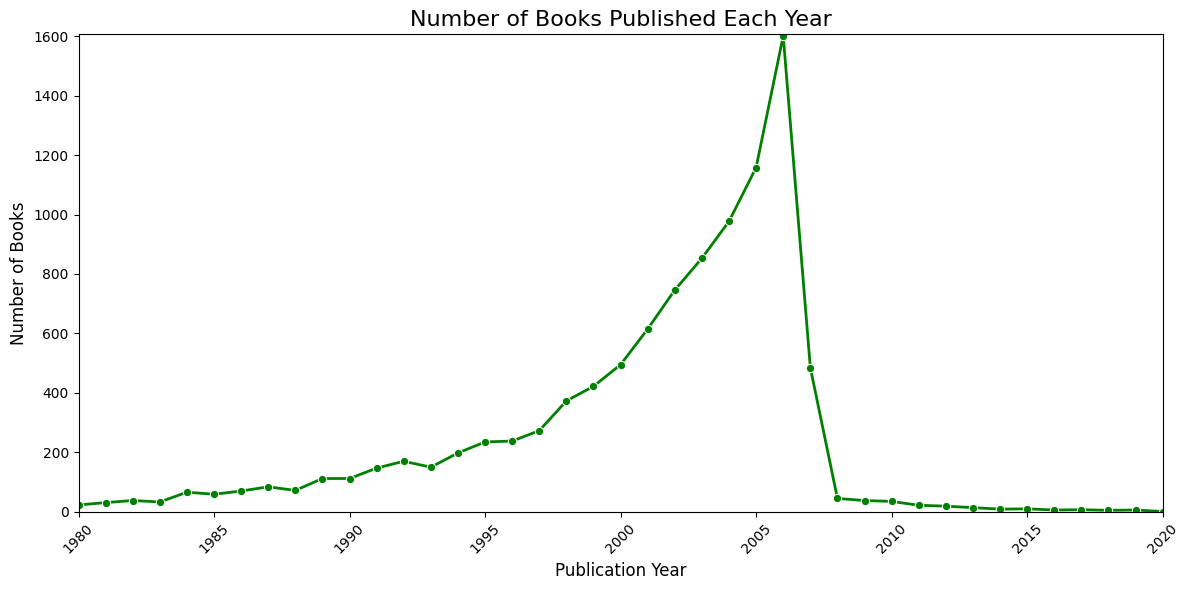

In [108]:
df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv', encoding='utf-8', on_bad_lines='skip')
df = df.dropna(subset=['publication_date'])
df = df.drop_duplicates(subset=['title'])
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['publication_year'] = df['publication_date'].dt.year
book_count_by_year = df.groupby('publication_year').size().reset_index(name='book_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=book_count_by_year, x='publication_year', y='book_count', marker='o', color='g', linewidth=2)
plt.xlim(1980, 2020)
plt.ylim(0, book_count_by_year['book_count'].max() + 5)
plt.title('Number of Books Published Each Year', fontsize=16)
plt.xlabel('Publication Year', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Revisions by tp 30 Publishers

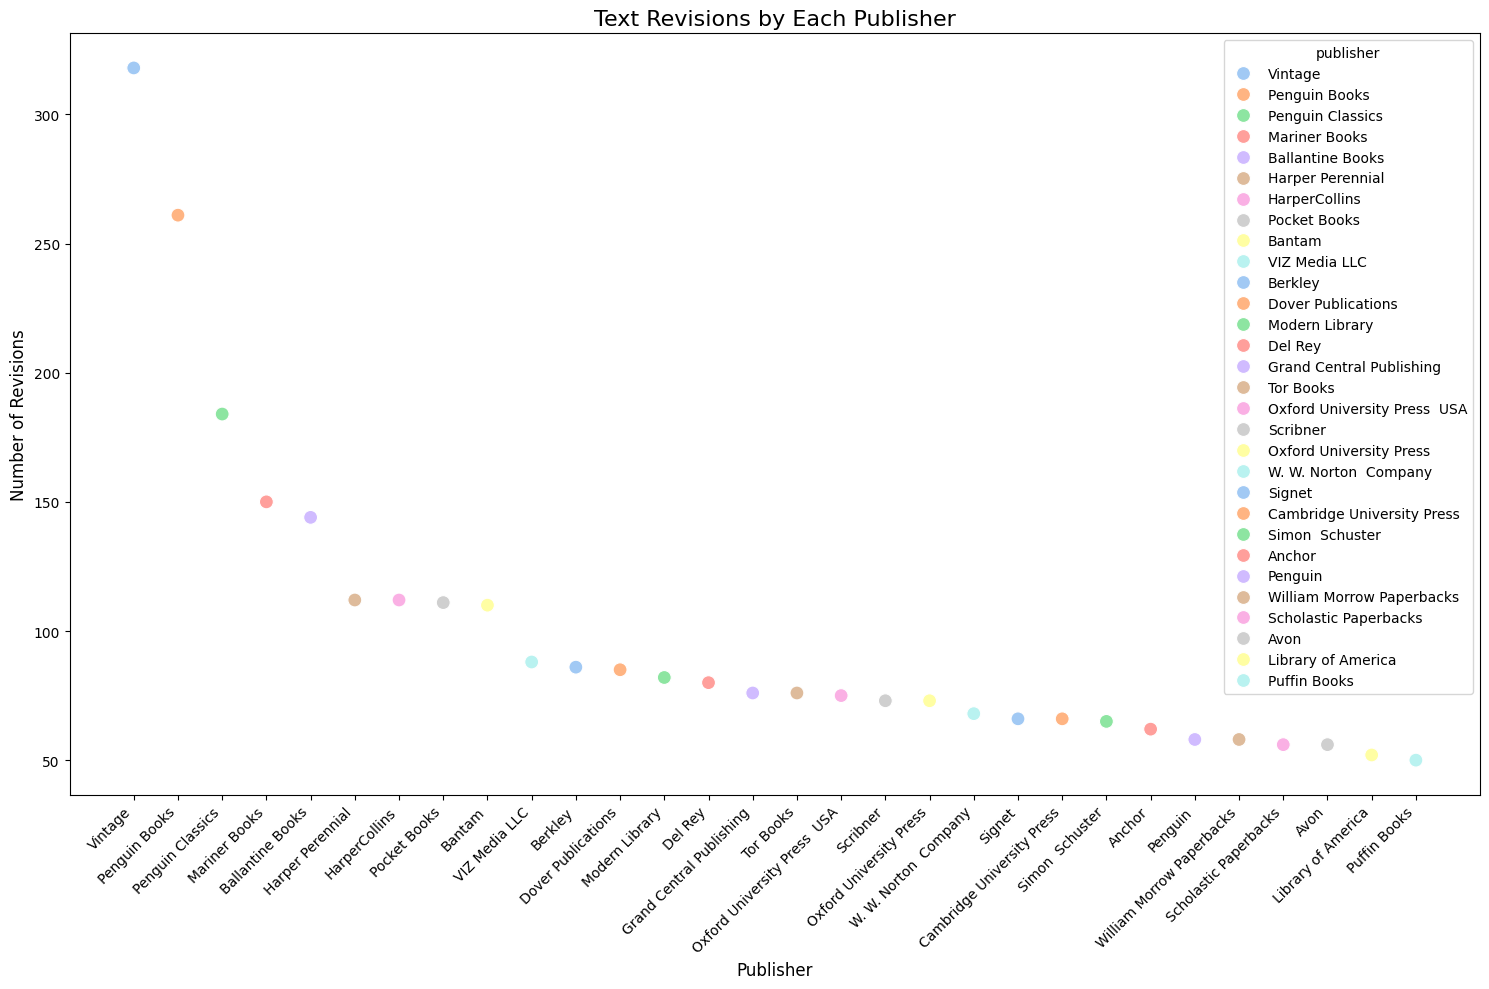

In [110]:

df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv', encoding='utf-8', on_bad_lines='skip')
df = df.dropna(subset=['publisher'])
publisher_revisions = df.groupby('publisher').size().reset_index(name='revision_count')
publisher_revisions = publisher_revisions.sort_values(by='revision_count', ascending=False).head(30)
plt.figure(figsize=(15, 10))
sns.scatterplot(data=publisher_revisions, x='publisher', y='revision_count', hue='publisher', palette='pastel', s=100)
plt.title('Text Revisions by Each Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Revisions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Publishers and Their Ratings Contribution

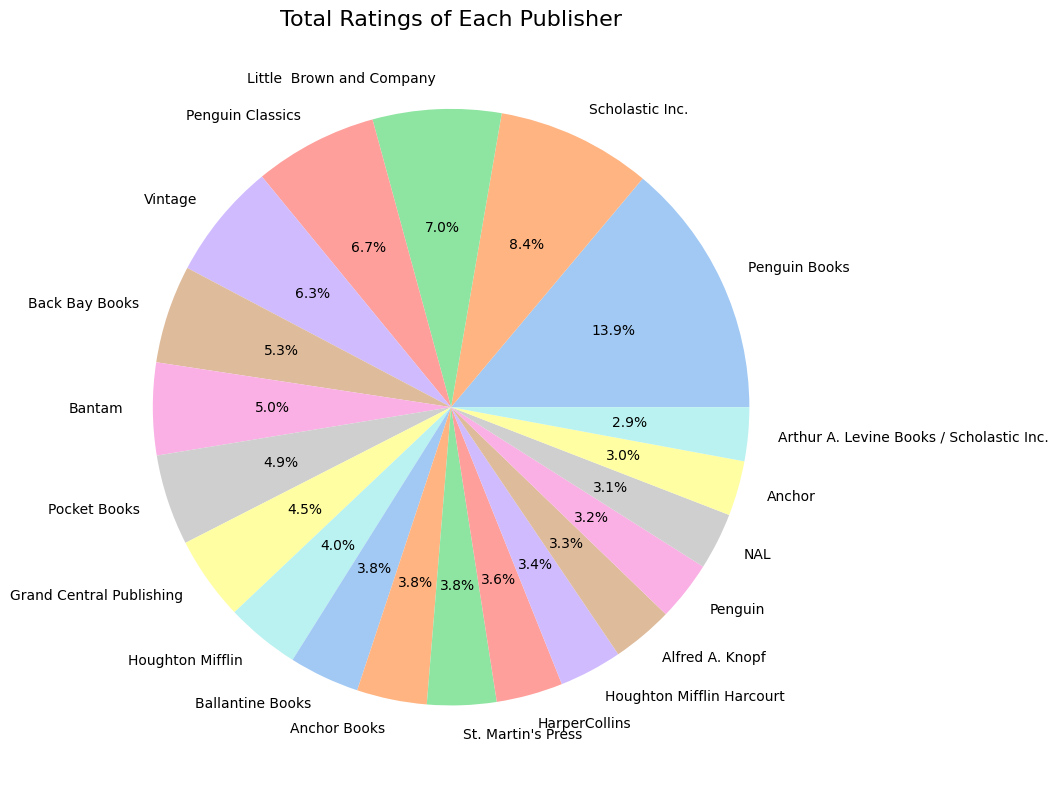

In [111]:
df = pd.read_csv('F:/4th semeter/AILAB/Books/books.csv', encoding='utf-8', on_bad_lines='skip')
df = df.dropna(subset=['publisher', 'ratings_count'])
publisher_ratings = df.groupby('publisher')['ratings_count'].sum().reset_index(name='ratings_count')
publisher_ratings = publisher_ratings.sort_values(by='ratings_count', ascending=False).head(20)
plt.figure(figsize=(10, 8))
plt.pie(publisher_ratings['ratings_count'], labels=publisher_ratings['publisher'], autopct='%1.1f%%', colors=sns.color_palette("pastel", len(publisher_ratings)))
plt.title('Total Ratings of Each Publisher', fontsize=16)
plt.tight_layout()
plt.show()